# Titanic
https://www.kaggle.com/c/titanic

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

In [2]:
dataset=pd.read_csv('../input/train.csv')
testset=pd.read_csv('../input/test.csv')


In [3]:
dataset.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
print(dataset.dtypes)


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [6]:
print(dataset.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None


In [7]:
print(dataset.describe())


       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


0      male
1    female
2    female
3    female
4      male
5      male
6      male
7      male
8    female
9    female
Name: Sex, dtype: object


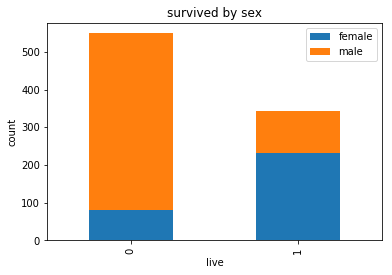

In [8]:
print (dataset['Sex'][0:10])
Survived_m = dataset.Survived[dataset.Sex == 'male'].value_counts()
Survived_f = dataset.Survived[dataset.Sex == 'female'].value_counts()

df=pd.DataFrame({'male':Survived_m, 'female':Survived_f})
df.plot(kind='bar', stacked=True)
plt.title("survived by sex")
plt.xlabel("live") 
plt.ylabel("count")
plt.show()


0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64


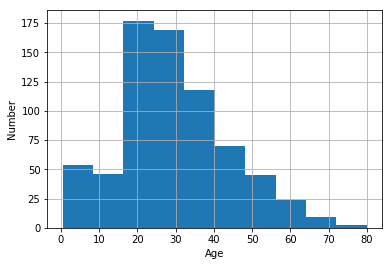

True


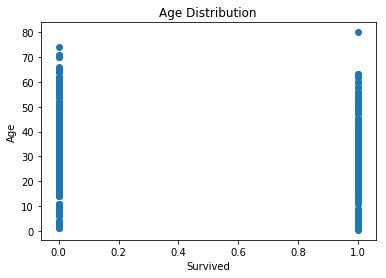

In [9]:
print (dataset['Age'][0:10])
dataset['Age'].hist()  ##hist会把数据当成x，数量当成y
plt.ylabel("Number") 
plt.xlabel("Age") 
plt.show()  

print(dataset['Age'].isnull().values.any())
plt.scatter(dataset['Survived'], dataset['Age'])
plt.ylabel("Age") 
plt.xlabel("Survived") 
plt.title("Age Distribution")
plt.show()


0     7.2500
1    71.2833
2     7.9250
3    53.1000
4     8.0500
5     8.4583
6    51.8625
7    21.0750
8    11.1333
9    30.0708
Name: Fare, dtype: float64


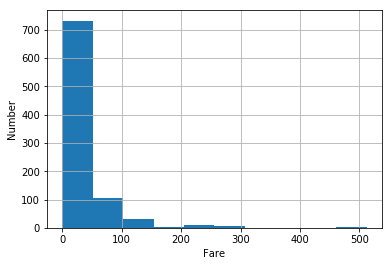

False


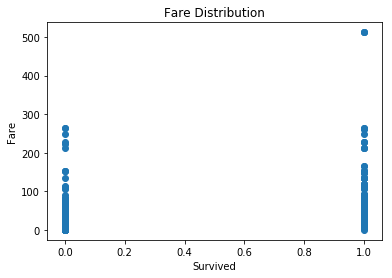

In [10]:
print (dataset['Fare'][0:10])
dataset['Fare'].hist()  
plt.ylabel("Number") 
plt.xlabel("Fare") 
plt.show()  

print(dataset['Fare'].isnull().values.any())
plt.scatter(dataset['Survived'], dataset['Fare'])
plt.ylabel("Fare") 
plt.xlabel("Survived") 
plt.title("Fare Distribution")
plt.show()


0    3
1    1
2    3
3    1
4    3
5    3
6    1
7    3
8    3
9    2
Name: Pclass, dtype: int64


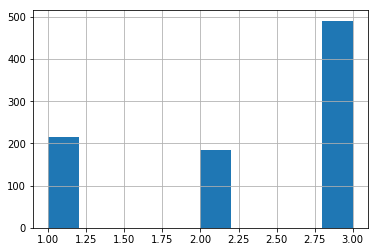

False
    p1  p2   p3
0   80  97  372
1  136  87  119


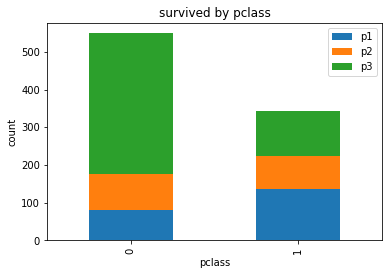

In [11]:
print (dataset['Pclass'][0:10])
dataset['Pclass'].hist()  
plt.show()  
print(dataset['Pclass'].isnull().values.any())

Survived_p1 = dataset.Survived[dataset['Pclass'] == 1].value_counts()
Survived_p2 = dataset.Survived[dataset['Pclass'] == 2].value_counts()
Survived_p3 = dataset.Survived[dataset['Pclass'] == 3].value_counts()

df=pd.DataFrame({'p1':Survived_p1, 'p2':Survived_p2, 'p3':Survived_p3})
print(df)
df.plot(kind='bar', stacked=True)
plt.title("survived by pclass")
plt.xlabel("pclass") 
plt.ylabel("count")
plt.show()


0    S
1    C
2    S
3    S
4    S
5    Q
6    S
7    S
8    S
9    C
Name: Embarked, dtype: object
0    427
1    217
Name: Survived, dtype: int64


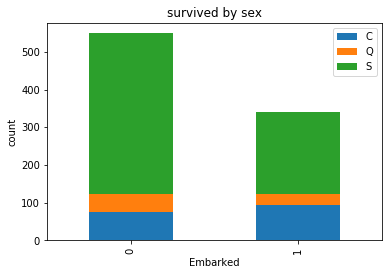

In [12]:
print (dataset['Embarked'][0:10])
Survived_S = dataset.Survived[dataset['Embarked'] == 'S'].value_counts()
Survived_C = dataset.Survived[dataset['Embarked'] == 'C'].value_counts()
Survived_Q = dataset.Survived[dataset['Embarked'] == 'Q'].value_counts()

print(Survived_S)
df = pd.DataFrame({'S':Survived_S, 'C':Survived_C, 'Q':Survived_Q})
df.plot(kind='bar', stacked=True)
plt.title("survived by sex")
plt.xlabel("Embarked") 
plt.ylabel("count")
plt.show()


In [13]:
label=dataset.loc[:,'Survived']
data=dataset.loc[:,['Pclass', 'Sex', 'Age', 'Fare', 'Embarked']]
testdat=testset.loc[:,['Pclass', 'Sex', 'Age', 'Fare', 'Embarked']]

print(data.shape)
print(data)

(891, 5)
     Pclass     Sex   Age      Fare Embarked
0         3    male  22.0    7.2500        S
1         1  female  38.0   71.2833        C
2         3  female  26.0    7.9250        S
3         1  female  35.0   53.1000        S
4         3    male  35.0    8.0500        S
5         3    male   NaN    8.4583        Q
6         1    male  54.0   51.8625        S
7         3    male   2.0   21.0750        S
8         3  female  27.0   11.1333        S
9         2  female  14.0   30.0708        C
10        3  female   4.0   16.7000        S
11        1  female  58.0   26.5500        S
12        3    male  20.0    8.0500        S
13        3    male  39.0   31.2750        S
14        3  female  14.0    7.8542        S
15        2  female  55.0   16.0000        S
16        3    male   2.0   29.1250        Q
17        2    male   NaN   13.0000        S
18        3  female  31.0   18.0000        S
19        3  female   NaN    7.2250        C
20        2    male  35.0   26.0000        S
2

In [14]:
def fill_NAN(data):  
    data_copy = data.copy(deep=True)
    data_copy.loc[:,'Age'] = data_copy['Age'].fillna(data_copy['Age'].median())
    data_copy.loc[:,'Fare'] = data_copy['Fare'].fillna(data_copy['Fare'].median())
    data_copy.loc[:,'Pclass'] = data_copy['Pclass'].fillna(data_copy['Pclass'].median())
    data_copy.loc[:,'Sex'] = data_copy['Sex'].fillna('female')
    data_copy.loc[:,'Embarked'] = data_copy['Embarked'].fillna('S')
    return data_copy


data_no_nan = fill_NAN(data)
testdat_no_nan = fill_NAN(testdat)

print(testdat.isnull().values.any())    
print(testdat_no_nan.isnull().values.any())
print(data.isnull().values.any())    

print(data_no_nan)

# print(data)

True
False
True
     Pclass     Sex   Age      Fare Embarked
0         3    male  22.0    7.2500        S
1         1  female  38.0   71.2833        C
2         3  female  26.0    7.9250        S
3         1  female  35.0   53.1000        S
4         3    male  35.0    8.0500        S
5         3    male  28.0    8.4583        Q
6         1    male  54.0   51.8625        S
7         3    male   2.0   21.0750        S
8         3  female  27.0   11.1333        S
9         2  female  14.0   30.0708        C
10        3  female   4.0   16.7000        S
11        1  female  58.0   26.5500        S
12        3    male  20.0    8.0500        S
13        3    male  39.0   31.2750        S
14        3  female  14.0    7.8542        S
15        2  female  55.0   16.0000        S
16        3    male   2.0   29.1250        Q
17        2    male  28.0   13.0000        S
18        3  female  31.0   18.0000        S
19        3  female  28.0    7.2250        C
20        2    male  35.0   26.0000    

In [15]:
print(data_no_nan['Sex'].isnull().values.any())

def transfer_sex(data):
    data_copy = data.copy(deep=True)
    data_copy.loc[data_copy['Sex'] == 'female', 'Sex'] = 0
    data_copy.loc[data_copy['Sex'] == 'male', 'Sex'] = 1
    return data_copy

data_after_sex = transfer_sex(data_no_nan)
testdat_after_sex = transfer_sex(testdat_no_nan)
print(testdat_after_sex)
    

False
     Pclass Sex   Age      Fare Embarked
0         3   1  34.5    7.8292        Q
1         3   0  47.0    7.0000        S
2         2   1  62.0    9.6875        Q
3         3   1  27.0    8.6625        S
4         3   0  22.0   12.2875        S
5         3   1  14.0    9.2250        S
6         3   0  30.0    7.6292        Q
7         2   1  26.0   29.0000        S
8         3   0  18.0    7.2292        C
9         3   1  21.0   24.1500        S
10        3   1  27.0    7.8958        S
11        1   1  46.0   26.0000        S
12        1   0  23.0   82.2667        S
13        2   1  63.0   26.0000        S
14        1   0  47.0   61.1750        S
15        2   0  24.0   27.7208        C
16        2   1  35.0   12.3500        Q
17        3   1  21.0    7.2250        C
18        3   0  27.0    7.9250        S
19        3   0  45.0    7.2250        C
20        1   1  55.0   59.4000        C
21        3   1   9.0    3.1708        S
22        1   0  27.0   31.6833        S
23        

In [16]:

def transfer_embark(data):
    data_copy = data.copy(deep=True)
    data_copy.loc[data_copy['Embarked'] == 'S', 'Embarked'] = 0
    data_copy.loc[data_copy['Embarked'] == 'C', 'Embarked'] = 1
    data_copy.loc[data_copy['Embarked'] == 'Q', 'Embarked'] = 2
    return data_copy

data_after_embarked = transfer_embark(data_after_sex)
testdat_after_embarked = transfer_embark(testdat_after_sex)
print(testdat_after_embarked)

     Pclass Sex   Age      Fare Embarked
0         3   1  34.5    7.8292        2
1         3   0  47.0    7.0000        0
2         2   1  62.0    9.6875        2
3         3   1  27.0    8.6625        0
4         3   0  22.0   12.2875        0
5         3   1  14.0    9.2250        0
6         3   0  30.0    7.6292        2
7         2   1  26.0   29.0000        0
8         3   0  18.0    7.2292        1
9         3   1  21.0   24.1500        0
10        3   1  27.0    7.8958        0
11        1   1  46.0   26.0000        0
12        1   0  23.0   82.2667        0
13        2   1  63.0   26.0000        0
14        1   0  47.0   61.1750        0
15        2   0  24.0   27.7208        1
16        2   1  35.0   12.3500        2
17        3   1  21.0    7.2250        1
18        3   0  27.0    7.9250        0
19        3   0  45.0    7.2250        1
20        1   1  55.0   59.4000        1
21        3   1   9.0    3.1708        0
22        1   0  27.0   31.6833        0
23        1   1 

In [17]:


data_now = data_after_embarked
testdat_now = testdat_after_embarked
from sklearn.model_selection import train_test_split


X_train,X_test,y_train,y_test=train_test_split(data_now,label,random_state=0,train_size=0.8)



/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2010: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [18]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(712, 5) (179, 5) (712,) (179,)


In [19]:
X_test.head()
X_train.head()


,Pclass,Sex,Age,Fare,Embarked
140,3,0,28.0,15.2458,1
439,2,1,31.0,10.5000,0
817,2,1,31.0,37.0042,1
378,3,1,20.0,4.0125,1
491,3,1,21.0,7.2500,0


In [20]:
X_test.values
X_train.values

array([[3, 0, 28.0, 15.2458, 1],
       [2, 1, 31.0, 10.5, 0],
       [2, 1, 31.0, 37.0042, 1],
       ...,
       [3, 1, 28.0, 7.7333, 2],
       [3, 0, 36.0, 17.4, 0],
       [2, 1, 60.0, 39.0, 0]], dtype=object)

In [21]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
class knn():
    
    def __init__(self):
        pass
    
    def fit(self, x, y):
        self.X_train = x
        self.y_train = y
        
        
    def predict(self, X, k = 3):
        dataSetSize = self.X_train.shape[0]

        
        testMat = np.tile(X, (dataSetSize, 1))
  
        diffMat = testMat - self.X_train
        sqDiffMat = diffMat ** 2
        sumDiffMat = sqDiffMat.sum(axis = 1)
        distance = sumDiffMat ** 0.5
        sortedDistance = distance.argsort()
        
        #print(len(sortedDistance),len(y_train))
              
        classCount = {}
        for i in range(k):
            label = self.y_train[sortedDistance[i]]
            classCount[label] = classCount.get(label, 0) + 1
            
        max = 0
        ans = 0
        for k,v in classCount.items():
            if (v > max):
                ans = k
                max = v
                
        return ans
        
        
classifier = knn()
classifier.fit(X_train.values, y_train.values)
prediction = np.zeros(X_test.shape[0])
for k in range(100):
    for i in range(X_test.shape[0]):
        pred = classifier.predict(X_test.values[i], k)
        prediction[i] = pred
    print(accuracy_score(y_test,prediction))

0.6145251396648045
0.6815642458100558
0.6815642458100558
0.7094972067039106
0.7430167597765364
0.7318435754189944
0.7318435754189944
0.7486033519553073
0.7486033519553073
0.7318435754189944
0.7374301675977654
0.7318435754189944
0.7262569832402235
0.7262569832402235
0.7374301675977654
0.7318435754189944
0.7374301675977654
0.7374301675977654
0.7541899441340782
0.7374301675977654
0.7486033519553073
0.7597765363128491
0.7653631284916201
0.7541899441340782
0.770949720670391
0.770949720670391
0.776536312849162
0.7541899441340782
0.7653631284916201
0.7597765363128491
0.7653631284916201
0.7541899441340782
0.776536312849162
0.7653631284916201
0.7541899441340782
0.7653631284916201
0.7597765363128491
0.7374301675977654
0.7597765363128491
0.7430167597765364
0.7430167597765364
0.7486033519553073
0.7374301675977654
0.7374301675977654
0.7374301675977654
0.7318435754189944
0.7374301675977654
0.7486033519553073
0.7374301675977654
0.7486033519553073
0.7318435754189944
0.7318435754189944
0.73184357541899